In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model


In [6]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model')

In [7]:
from inltk.tokenizer import MalyalamTokenizer

In [8]:
MalyalamTokenizer

inltk.tokenizer.MalyalamTokenizer

In [9]:
# class MalyalamTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [10]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [11]:
# 10,000 is the vocab size that we chose in sentencepiece
malyalam_vocab = Vocab(itos)

In [13]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [14]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [15]:
data_lm = TextLMDataBunch.from_folder(path=path/'MalyalamDataset', tokenizer=tokenizer, vocab=malyalam_vocab)

In [16]:
data_lm.batch_size

64

In [17]:
data_lm.save()

In [18]:
data_lm.show_batch()

idx,text
0,ിക യിൽ ▁ഉൾപ്പെടുത്തിയ ിരിക്കുന്നത് . ▁സീ ബോ ൾഡ് സ് ▁ബീച്ച് ▁എന്ന യിനം ▁ബീ ച് ▁വൃക്ഷ ങ്ങൾ ▁നിറഞ്ഞ ▁വന മേഖല യാണ് ▁ഇവിടത്തെ ▁ഒരു ▁പ്രത്യേകത . ▁ശൈത്യകാലത്ത ് ▁പൂർണ്ണമായ ും ▁ഇലപ്പൊ ഴ ിക്കുന്ന ▁ഈ ▁മര ങ്ങൾ ▁ശൈത്യ ത്തിന്റെ ▁അവസാന ത്തോടെ ▁ഒരു ▁ശി ശി ര നി ദ്ര യിൽ നിന്ന െന്നപോലെ ▁ഉ ണ ര ുകയും ▁വീണ്ടും ▁ഇലകൾ ▁ത ളി ർ ക്ക ുവാൻ ▁ആരംഭിക്ക ുകയും ▁ചെയ്യുന്നു . ▁ജപ്പാ ന ിൽനിന്നും ▁ആദ്യമായി ▁ലോകപൈതൃക പട്ട ിക
1,സി യാർ ▁അലി ം ▁അക്ബർ ▁സാ നി ▁വാ ലാ ▁ഷാ ൻ ▁പാദ ് ഷാ - ഇ - ബാഹ ് ർ - ഉ - ബാർ ▁എന്നാണ് ▁മുഴുവൻ ▁പേര് . ▁മുഗൾ ▁സാമ്രാജ്യ ത്തിലെ ▁ദുർബല നായ ▁ചക്രവർത്തി യാ യാണ് ▁ഫറൂഖ് ▁സി യാർ ▁വിലയിരുത്ത പ്പെടുന്നത് . ▁ഉപ ജാ പ ക സംഘ ത്തിന്റെ ▁പ്രേരണ യാൽ ▁പല തവണ ▁ഇദ്ദേഹം ▁വഴി തെ റ്റ ുകയും ▁സ്വതന്ത്ര മായി ▁ഭരണം ▁നടത്താൻ ▁സാധിക്ക ാതെ ▁വരികയും ▁ചെയ്തു . ▁ഹ സ്സ ൻ
2,▁പരീക്ഷ യും ▁വിജയിച്ചു . ▁ശ്രീ മൂലം ▁തിരുനാൾ ▁ മഹാരാജാവ ് ▁18 90 ൽ ▁എ . ആ റിനെ ▁സംസ്കൃത ▁പാഠ ശാല യിൽ ▁ഇൻ സ് പെ ക്ട റായി ▁നിയമ ിച്ചു . ▁എ . ആർ . ▁ഈ ▁കാലയളവിൽ ▁നിഷ് ക ൃഷ്ട മായ ▁പാഠ ്യ പദ്ധതി യും ▁പാശ്ചാത്യ രീതി യിലുള്ള ▁ശിക്ഷ ാക്രമ വും ▁നടപ്പാക്ക ി . ▁ജോലി ക്കിടയിൽ ▁സംസ്കൃത ത്തിൽ ▁എം . എ . ▁എഴുതിയ െടുത്തു . ▁18 94 ൽ ▁സംസ്കൃത ▁മഹാ പാഠ
3,• ▁വംശ പത്ര പതി തം • ▁വംശ യ ഷ്ട ിക • ▁വംശ സ്ഥ ം • ▁വ ് യാള ം • ▁ശങ്കര ചര ിത ം • ▁ശ ശ ധര ബി ംബ ം • ▁ശശി കല • ▁ശശി കല • ▁ശ ാ ർദ്ദ ൂ ല വി ക്രീ ഡി തം • ▁ ശാല ിനി • ▁ശിഖര ിണി • ▁ശിവ ം • ▁ശി താ ഗ്ര • ▁ശുദ്ധ വി രാ ൾ • ▁ശിശു ഭ
4,ശ ിക്കാൻ ▁തുടങ്ങി . ▁ഈ ▁സമയത്ത് ▁തന്റെ ▁തോ ക്കിൽ ▁നിന്ന് ▁മംഗൽ ▁സ്വയം ▁വെടി യു തി ർ ക്കാൻ ▁ശ്രമിച്ച െങ്കിലും ▁പരാജയപ്പെട്ടു . ▁നി സ് സാര മായ ▁പര ു ക്ക േറ്റ ▁മംഗൽ ▁പാണ്ഡേ യെ ▁അറസ്റ്റ് ▁ചെയ്തു . ▁ബംഗാൾ ▁സൈന്യ ത്തിൽ ▁പുതിയ തായി ▁എത്തിയ ▁എൻ ഫീൽഡ ് - പി - 53 ▁തോ ക്ക ുകളിൽ ▁ഉപയോഗിക്കുന്ന ▁തിര കള െക്കുറിച്ചുള്ള ▁ദു രീ കരിക്ക ാത്ത ▁സംശയ ങ്ങളായിരുന്നു ▁മംഗൽ ▁പാണ്ഡേ യുടെ ▁പെരു മാറ്റ ത്തിനു ▁കാരണമായി ▁ചൂണ്ടിക്കാണിക്ക


In [19]:
len(data_lm.vocab.itos)

10000

In [20]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [21]:
gc.collect()

1406

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


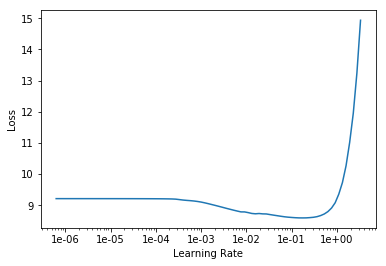

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.313389,5.317996,0.192926


In [31]:
learn.save('first', with_opt=True)

In [32]:
learn.load('first', with_opt=True);

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.821220,4.947171,0.226521
2,4.540115,4.586594,0.260965
3,4.207016,4.262999,0.297599
4,3.762584,3.946911,0.340401
5,3.615202,3.868199,0.352610


In [35]:
learn.save('second_ml_lm', with_opt=True)

In [36]:
learn.load('second_ml_lm', with_opt=True);

In [37]:
learn.fit_one_cycle(40, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.639483,3.862605,0.353660
2,3.576721,3.854642,0.354983
3,3.498712,3.841652,0.356866
4,3.502330,3.824311,0.359579
5,3.529691,3.801533,0.363115
6,3.505868,3.778597,0.366981
7,3.488365,3.752562,0.371378
8,3.433761,3.722181,0.376249
9,3.494640,3.692692,0.380994
10,3.242538,3.665724,0.385454


In [38]:
learn.save('third_ml_lm', with_opt=True)

In [22]:
learn.load('third_ml_lm', with_opt=True);

In [23]:
TEXT = "ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി"
N_WORDS = 40
N_SENTENCES = 2

In [24]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ▁അധികാര ത്തില ിരുന്ന തിനെ ▁തുടർന്ന് ▁ഭരണ ാധികാര ത്തിനെതിരെ യുള്ള ▁പ്രക്ഷോഭ ങ്ങൾ ▁തുടര ുകയും ▁നടപ്പാക്ക ുകയും ▁ചെയ്തു . ▁എന്നാൽ ▁ഈ ▁നിയമം ▁ ബ്രിട്ടീഷുകാരുടെ ▁കൈ യില ക പ്പെട ാതെ ▁വന്ന തിനാൽ ▁ഇന്ത്യയുടെ ▁സ്വാതന്ത്ര്യ ത്തിന് ▁ശേഷം ▁സി . എം . എസ് . ▁വൈസ്
ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ക്ക് ▁കർശന മായ ▁ഒരു ▁സ്കൂൾ ▁സ്ഥാപിക്ക ുന്നതിന് ▁വേണ്ടി ▁വിദ്യാഭ്യാസ ▁സംവിധാന ത്തിനായി ▁നടത്തുന്ന ▁പദ്ധതി യാണ് ▁ഇന്റർനാഷണൽ ▁ഇൻസ്റ്റിറ്റ്യൂ ട്ട് ▁ഓഫ് ▁ടെക്നോളജി . ▁കേരള ▁സംസ്ഥാന ▁ഐ . ടി . ഒ ▁ യുടെ ▁സ്ഥാപക ൻ ▁എന്ന ▁നിലയിൽ ▁പ്രവർത്തിച്ച ിട്ടുണ്ട് . ▁1999 ▁ൽ ▁ജ യിൽ


In [42]:
np.exp(3.273)

26.39039188081262

In [25]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [12]:
# Generating embedding vectors for visualization

In [13]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model')

In [14]:
defaults.device = torch.device('cpu')

In [15]:
learn = load_learner(path / 'MalyalamDataset/')

In [16]:
encoder = get_model(learn.model)[0]

In [17]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([10000, 400])

In [18]:
embeddings = encoder.state_dict()['encoder.weight']

In [19]:
embeddings = np.array(embeddings)

In [20]:
embeddings[0].shape

(400,)

In [21]:
df = pd.DataFrame(embeddings)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.291967,-0.002322,-0.209247,-0.458362,-0.211871,0.525119,0.216968,0.683054,-0.000421,-0.451211,...,-0.018488,-0.209655,0.576393,0.742110,0.626956,-0.273615,-0.226769,-0.459669,-0.138513,0.613912
1,-0.273549,0.049740,-1.247350,-1.372303,0.257762,-0.763619,-0.482961,0.171256,0.684894,0.376489,...,0.547570,0.743707,0.798664,-0.216511,-0.258916,-0.239699,-0.022576,0.593854,0.076901,-0.260444
2,-0.230950,0.072833,-1.153181,-1.288029,0.275702,-0.715835,-0.478983,0.099732,0.692943,0.347465,...,0.525808,0.640240,0.775471,-0.225178,-0.279536,-0.167131,-0.010020,0.608966,0.082256,-0.256163
3,1.527329,-0.199170,0.261630,-0.411390,0.225107,-0.032793,0.307198,0.282542,-0.511452,-0.663876,...,-0.942614,0.064960,0.044630,0.406766,0.304243,-0.106900,-0.311188,1.198795,-0.061395,-0.982869
4,-0.253548,-0.032533,-0.413230,0.201865,0.209467,0.416606,1.055918,-0.190680,0.999718,-0.150951,...,0.035856,0.736521,0.932499,0.811180,0.393260,-0.127388,0.585211,0.252797,0.105065,0.084277


In [23]:
df.shape

(10000, 400)

In [24]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [25]:
df2 = pd.DataFrame(itos)

In [26]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,്


In [27]:
df2.shape

(10000, 1)

In [28]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [29]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.7355e-01,  4.9740e-02, -1.2474e+00, -1.3723e+00,  2.5776e-01,
        -7.6362e-01, -4.8296e-01,  1.7126e-01,  6.8489e-01,  3.7649e-01,
         1.2907e-01,  1.1018e-01,  5.1568e-01,  7.9365e-02, -1.9693e-01,
         1.5606e+00,  1.3909e-01,  4.4212e-01,  2.8622e-01,  1.9001e-01,
         4.1099e-01,  1.1254e+00, -2.0873e-01, -7.7392e-02,  5.6829e-01,
         3.9020e-01,  6.2949e-01,  1.7590e-01,  3.3018e-01,  2.8685e-01,
        -7.7555e-01,  3.0622e-01,  1.7872e-01,  9.3845e-01,  4.2830e-02,
        -8.5402e-02, -5.2553e-01,  4.3522e-01,  2.7174e-01, -1.2583e-01,
         4.8475e-01, -3.7728e-01, -3.6608e-01,  5.4688e-01,  2.1373e-01,
        -5.6125e-01, -2.7174e-01, -9.3416e-01,  2.4786e-01, -5.0529e-01,
        -3.4035e-01, -2.1120e-01,  3.7982e-02, -1.2824e-01, -3.4154e-01,
         8.7507e-01,  4.3182e-01,  3.1867e-01, -1.1197e+00, -1.2728e-01,
         9.6618e-01, -7.5389e-02, -3.4188e-01,  2.2546e-01,  1.7317e-01,
         1.4208e+00,  1.1709e-01, -1.9090e-02, -4.0